In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Data Collection and Processing

In [40]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [41]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [42]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [43]:
# number of rows and  columns
gold_data.shape

(2290, 6)

In [44]:
# basic information about the  data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [45]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [46]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correlation:
1. Positive
2. Negative

In [48]:

# Convert 'Date' column to datetime
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Convert 'Date' column to numeric format (e.g., timestamp)


In [49]:
numeric_data = gold_data.drop(columns=['Date', 'Date_numeric'])


In [50]:
correlation = numeric_data.corr()

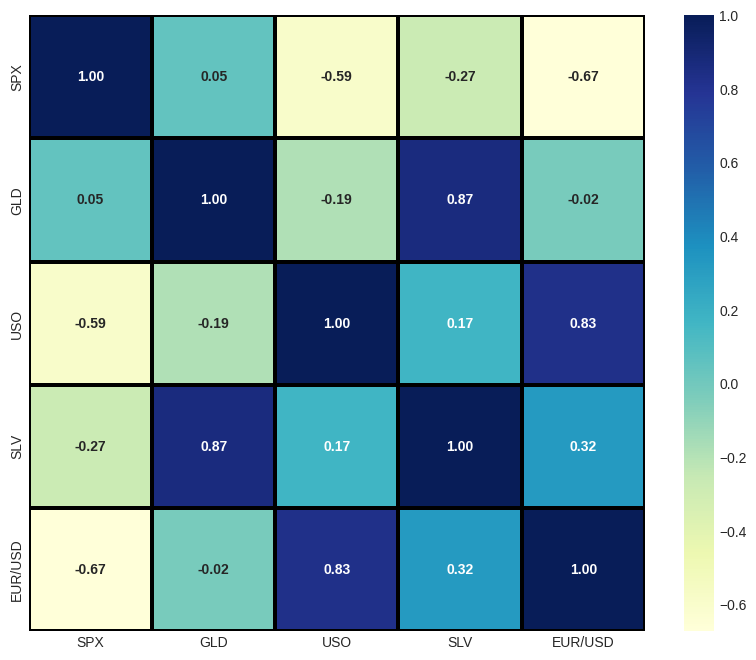

In [51]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    correlation,
    cbar=True,
    square=True,
    fmt='.2f',
    annot=True,
    annot_kws={'size':10, 'weight':'bold'},  # Making annotations bold
    cmap='YlGnBu',  # Using 'YlGnBu' colormap for a fresh design
    linewidths=1.5,  # Adjusted line widths
    linecolor='Black'  # Changed line color to white for better contrast
)

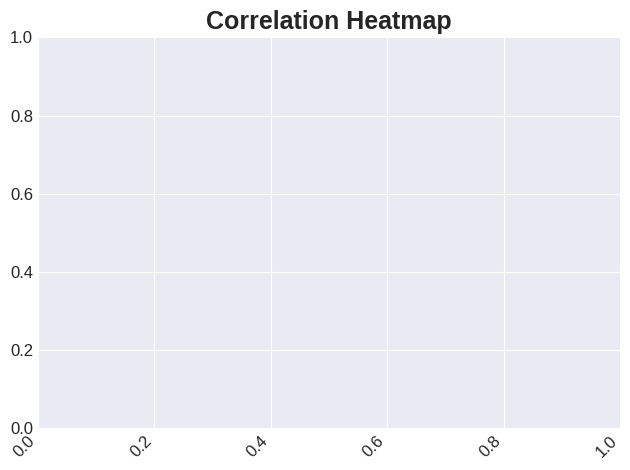

In [52]:
# Set the title and adjust the layout
plt.title('Correlation Heatmap', fontsize=18, weight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotated x-axis labels for better readability
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()

# Display the heatmap
plt.show()

In [53]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-54-b94eac2e88dd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

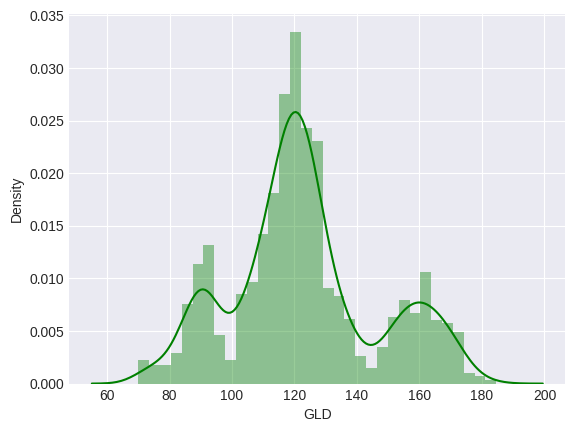

In [54]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [57]:
X = gold_data.drop(['Date','Date_numeric','GLD'],axis=1)
Y = gold_data['GLD']

In [58]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [59]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [61]:
regressor = RandomForestRegressor(n_estimators=100)

In [62]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [63]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [64]:
print(test_data_prediction)

[168.5237993   81.78759968 115.60889987 127.72390055 120.93100095
 154.67359727 150.13499839 126.0437002  117.45359867 126.0727009
 116.70590083 171.62950054 141.750799   167.99049876 115.13020004
 117.5608004  139.28060288 170.29690099 159.72250297 160.0962992
 155.10260019 125.34260019 176.59919944 156.88700231 125.08970065
  93.75829966  76.95750037 120.53599996 119.09169936 167.34279976
  88.15660047 125.10880034  91.04330062 117.68480059 121.12129953
 136.13240074 115.46590115 115.29440099 147.1587999  107.32740099
 104.40090227  87.27159795 126.47580092 118.05740014 152.40359912
 119.60519991 108.49969972 108.0514982   93.21300096 127.1817975
  74.66880051 113.6365991  121.31210004 111.03039912 118.98339908
 120.97439937 159.01490014 167.89360091 147.1823965   85.83959855
  94.29350016  86.85999853  90.62970066 119.09340054 126.47790105
 127.61699971 169.13679956 122.22239911 117.31599907  98.50800032
 168.6347013  143.19629828 131.70370192 121.12610244 121.59959951
 119.7305007 

In [65]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9893957181698433


In [67]:
Y_test = list(Y_test)

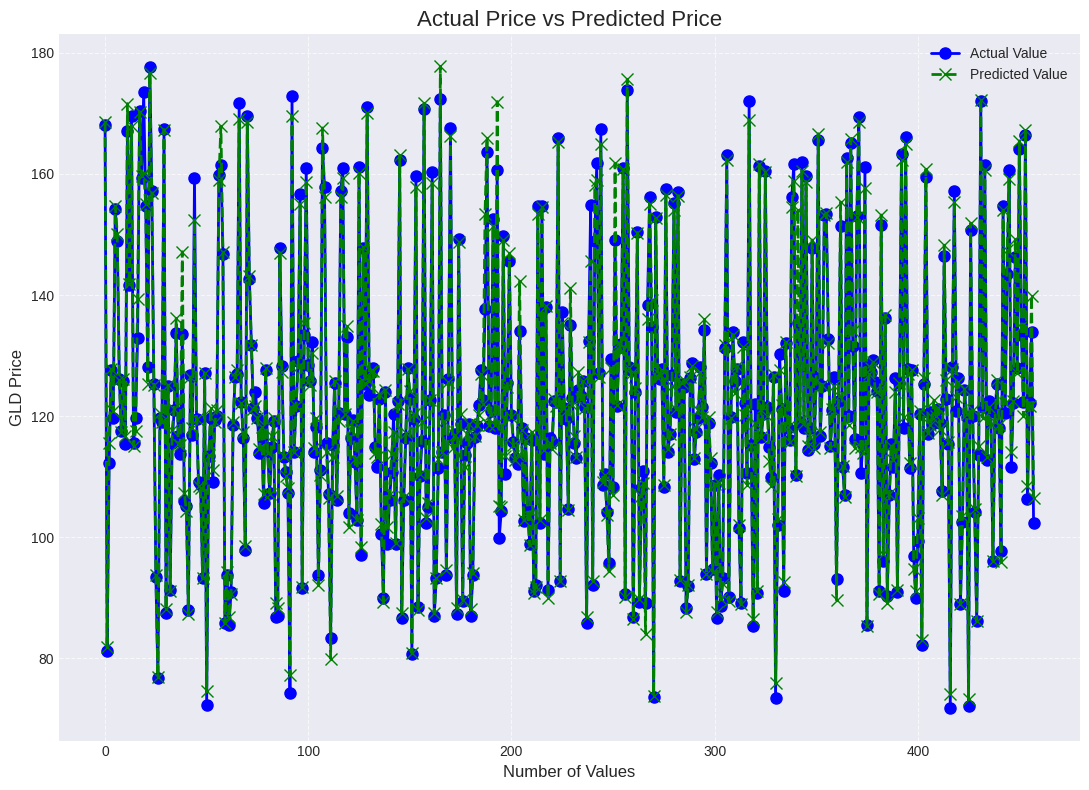

In [73]:
plt.figure(figsize=(11, 8))  # Adjusted figure size for better visibility

# Plot actual values with solid blue line and circle markers
plt.plot(Y_test, color='blue', marker='o', linestyle='-', linewidth=2, markersize=8, label='Actual Value')

# Plot predicted values with dashed green line and cross markers
plt.plot(test_data_prediction, color='green', marker='x', linestyle='--', linewidth=2, markersize=8, label='Predicted Value')

# Add titles and labels with adjusted font sizes
plt.title('Actual Price vs Predicted Price', fontsize=16)
plt.xlabel('Number of Values', fontsize=12)
plt.ylabel('GLD Price', fontsize=12)

# Add legend with improved positioning and font size
plt.legend(loc='upper right', fontsize=10)

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust tick font sizes and styles
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()